In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
'ok'

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


'ok'

In [3]:
training_epochs = 25
learning_rate = 0.01
batch_size = 100
display_step = 1

In [5]:
# Input tensor, represents the mnist data image size of 28 x 28 = 784
x = tf.placeholder('float', [None, 784])

# Output tensor with 10 probabilities
y = tf.placeholder('float', [None, 10])

In [8]:
# Weight input tensor
W = tf.Variable(tf.zeros([784, 10]))

In [10]:
# Tensor bias
b = tf.Variable(tf.zeros([10]))

In [11]:
# Evidence that a certain image belongs to a particular class
evidence = tf.matmul(x, W) + b

In [13]:
# Output vector of probabilities
activation = tf.nn.softmax(tf.matmul(x, W) + b)

In [15]:
cross_entropy = y * tf.log(activation)

In [16]:
# Cost function to minimize cross entropy
cost = tf.reduce_mean(-tf.reduce_mean(cross_entropy, reduction_indices = 1))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [23]:
avg_set = []
epoch_set = []

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict = {x: batch_xs, y: batch_ys})
            avg_cost += sess.run(cost, feed_dict = {x: batch_xs, y: batch_ys}) / total_batch
        if epoch % display_step == 0:
            print('Epoch: {} cost={:.9f}'.format(epoch + 1, avg_cost))
            avg_set.append(avg_cost)
            epoch_set.append(epoch + 1)
    
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    print('Model accuracy: {}'.format(accuracy.eval({x: mnist.test.images, y: mnist.test.labels})))

Epoch: 1 cost=0.204537639
Epoch: 2 cost=0.165456057
Epoch: 3 cost=0.139449794
Epoch: 4 cost=0.121718485
Epoch: 5 cost=0.109138935
Epoch: 6 cost=0.099841052
Epoch: 7 cost=0.092710072
Epoch: 8 cost=0.087071200
Epoch: 9 cost=0.082499972
Epoch: 10 cost=0.078709360
Epoch: 11 cost=0.075515459
Epoch: 12 cost=0.072780696
Epoch: 13 cost=0.070410789
Epoch: 14 cost=0.068333356
Epoch: 15 cost=0.066497231
Epoch: 16 cost=0.064859091
Epoch: 17 cost=0.063387628
Epoch: 18 cost=0.062056654
Epoch: 19 cost=0.060847154
Epoch: 20 cost=0.059741047
Epoch: 21 cost=0.058726750
Epoch: 22 cost=0.057790009
Epoch: 23 cost=0.056923780
Epoch: 24 cost=0.056119242
Epoch: 25 cost=0.055369310
Model accuracy: 0.8784999847412109


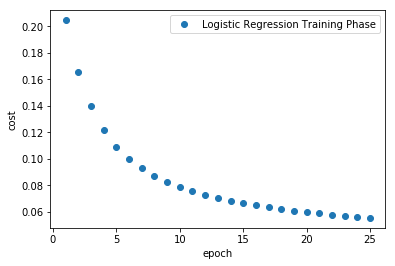

In [25]:
plt.plot(epoch_set, avg_set, 'o', label = 'Logistic Regression Training Phase')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend()